## Кластеризация

Центроид — это центр масс кластера, или среднее значение координат объектов кластера.

### Алгоритм K-means

Идея алгоритма состоит в том, что он разбивает множество элементов векторного пространства на заранее заданное пользователем число кластеров, а далее стремится минимизировать суммарное квадратичное отклонение объектов внутри кластера до центроида кластера.

Шаги алгоритма:
- Решаем, на сколько кластеров хотим разделить данные
- Чтобы сформировать кластеры, случайным образом выбираем три объекта из датасета. Эти три объекта будут представлять три разных кластера (жёлтый, розовый и зелёный). Так как в этих кластерах находится по одному объекту, то эти объекты будут считаться исходными центроидами кластеров
- Распределим оставшиеся объекты датасета по трём кластерам. Считается, что объект принадлежит к тому кластеру, к центроиду которого он находится ближе всего
- Теперь в каждом из кластеров больше одного объекта, и центр этих кластеров тоже изменился. Поэтому рассчитаем новые центроиды
- После этого для каждого объекта в выборке повторяем шаг 3, т. е. для каждого объекта датасета рассчитываем расстояние до центроидов
- Шаг 5 повторяется до тех пор, пока объекты датасета не перестанут менять кластеры, к которым они относятся. Как только объекты перестают это делать, алгоритм завершается и мы переходим к шагу 7
- Далее для каждого кластера подсчитаем среднеквадратичное отклонение объектов кластера до центроида: для каждого кластера считаем сумму квадратов расстояний от элементов кластера до его центроида
- Далее мы несколько раз заново запускаем алгоритм кластеризации, начиная с шага 2 (В sklearn по умолчанию проводится десять итераций)
- Среди получившихся кластеров нам необходимо найти наилучший вариант кластеризации. Лучшей будет признана кластеризация с минимальным значением среднеквадратичного отклонения

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
pokemon = pd.read_csv('/Users/olgazdanova/Downloads/pokemon.csv')
pokemon.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


In [3]:
X = pokemon[['Attack', 'Defense']]

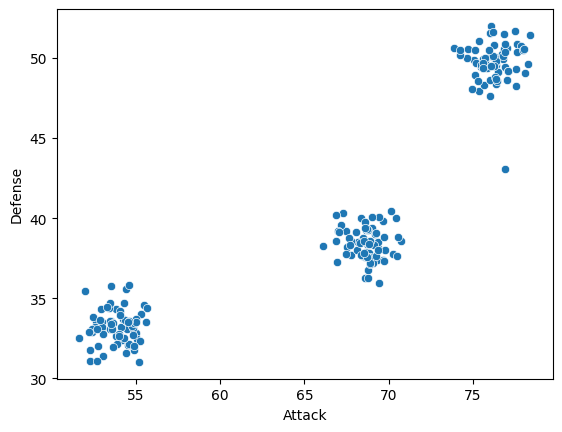

In [6]:
sns.scatterplot(x = pokemon.Attack, y = pokemon.Defense);

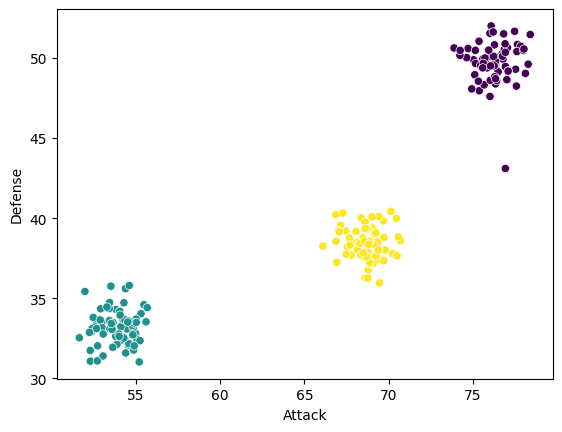

In [8]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
# предскажем, к какому кластеру принадлежат покемоны 
predictions = k_means.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = k_means.labels_

pokemon['Cluster_k3'] = predictions

sns.scatterplot(x = pokemon.Attack, y = pokemon.Defense, c=predictions); # параметр c принимает вектор с номерами классов для группировки объектов по цветам

**Недостатки алгоритма K_means:**
1. Необходимо заранее знать, на сколько кластеров мы хотим разделить данные
2. Очевидно, что для объектов, которые в равной степени принадлежат к разным кластерам, алгоритм k-means будет отрабатывать плохо
3. Алгоритм чувствителен к выбросам в данных, так как выбросы сильно искажают местонахождение центроида кластера
4. Плохо работает на данных, которые образуют удлинённые кластеры, а также на кластерах неправильной формы
5. Так как в самом начале работы алгоритма центроиды определяются случайным образом, результат сильно зависит от того, какие начальные объекты будут определены как центры кластеров

#### Определение оптимального k для алгоритма

**Метод локтя**

Идея состоит в том, что в самом начале при добавлении новых кластеров качество моделирования улучшается. Эта область называется недообученной (underfitting).

Дальнейшее добавление новых кластеров существенно не улучшает качество моделирования, а значит стоит прекратить их добавление. Данная область называется переобученной (overfitting).

На графике видно, что линия напоминает локоть — отсюда и название метода. Оптимальное число кластеров находится как раз на «локтевом сгибе». 

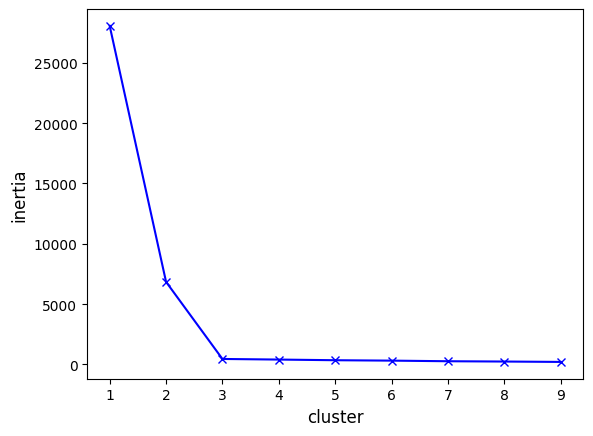

In [10]:
# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию 
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-');

Как можно заметить из графика, на сгибе k=3. Значит, оптимальное количество кластеров, подобранное с помощью алгоритма локтя, равняется трём. Значения k от 1 до 2 — недообученная область, а после значения 3 идёт переобучение.

Если вдруг в ходе работы вы встречаете график, на котором невозможно найти «локоть», на помощь придёт **коэффициент силуэта**

**Коэффициент силуэта** показывает, насколько объект похож на объекты кластера, в котором он находится, по сравнению с объектами из других кластеров. Силуэт варьируется от -1 до +1: чем выше значение, тем больше объекты похожи на объекты своего кластера и меньше похожи на объекты соседних кластеров.

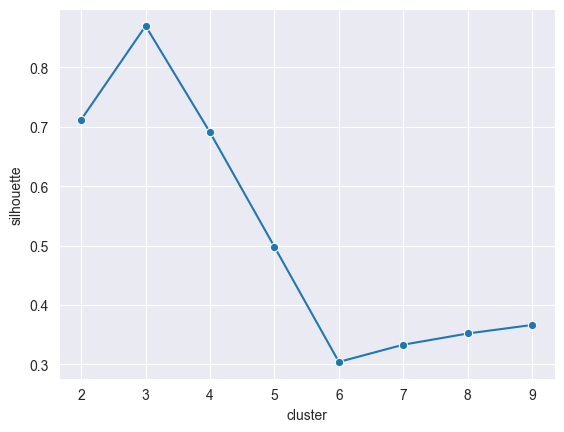

In [12]:
# посчитаем силуэт, используя sklearn
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = pokemon[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o");

Если вам нужно найти оптимальное количество кластеров для датасета, наиболее наглядным графиком будет график коэффициента силуэта, поэтому можно сразу воспользоваться им. Но стоит помнить, что для построения данного графика нужно минимум два кластера, так как мы сравниваем объекты одного кластера с другим, наиболее близким кластером.

In [13]:
df = pd.read_csv('/Users/olgazdanova/Downloads/values_from_the_instrument.csv')
df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


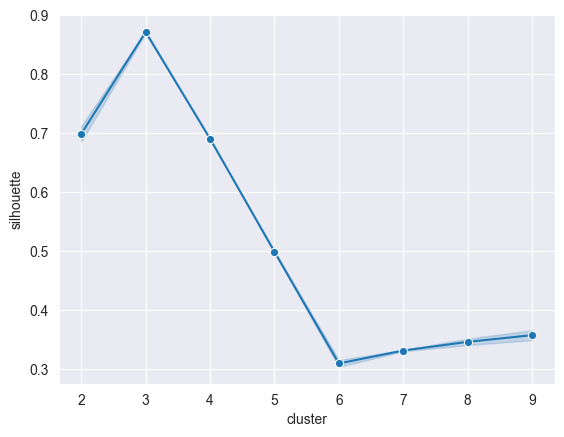

In [14]:
# выберем нужные данные 
X = df

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o");

### Метрики

Если наши данные все же размеченные, мы можем оценить качество работы четырьмя метриками:

1. Однородность кластеров - Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

In [16]:
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0
1.0


Почему во втором случае, несмотря на несовпадение labels, все равно метрика = 1? Это связано с тем, что кошки и собаки внутри кластера все же не перемешаны, поэтому однородность=1

2. Полнота кластера - Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

In [17]:
from sklearn.metrics.cluster import completeness_score
print(completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))

1.0


3. V-мера - комбинация метрик однородности и полноты. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

In [18]:
from sklearn.metrics import v_measure_score

4. Индекс Рэнда. Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

In [19]:
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])

1.0

In [20]:
homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2])

np.float64(0.737175493807016)

### Иерархическая кластеризация

Принцип иерархической кластеризации основан на построении дерева (иерархии) вложенных кластеров.

При иерархической кластеризации строится дендрограмма. Дендрограмма  — это древовидная диаграмма, которая содержит  уровней. Каждый уровень — это шаг укрупнения кластеров.

При иерархической кластеризации выделяют два подхода: агломеративный (снизу вверх) и дивизионный (сверху вниз).

Для каких задач используется иерархическая кластеризация?

- Для построения филогенетического дерева
- Для анализа текстов (Например, с помощью кластеризации Брауна (частный случай иерархической кластеризации) можно сгруппировать слова и найти синонимы. Слова, которые были встроены в похожие контексты и считаются семантически связанными, оказываются в одном кластере)

In [21]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_c = AgglomerativeClustering(n_clusters=2)
agglomerative_c.fit(X)

AgglomerativeClustering()

### EM-алгоритмы кластеризации

В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Один из примеров EM (Expectation-maximization)-алгоритма — это как раз k-means-кластеризация

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — **модель гауссовой смеси (Gaussian Mixture Model, GMM).** Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение.

Для каких задач используется ЕМ-кластеризация?

- K-means-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. 
- GMM можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации. 
- Используя GMM, можно анализировать временные ряды цен в периоды действия акций

In [22]:
from sklearn.mixture import GaussianMixture
gm_clustering = GaussianMixture(n_components=3, random_state=42) # задаем кол-во кластеров

X = pokemon[['Attack', 'Defense']]
gm_clustering.fit(X)
gm_prediction = gm_clustering.predict(X)

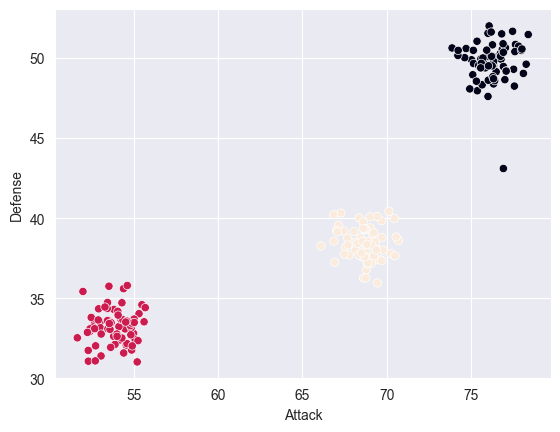

In [24]:
sns.scatterplot(x = pokemon.Attack, y = pokemon.Defense, c=gm_prediction);

In [25]:
house = pd.read_csv('/Users/olgazdanova/Downloads/housing 2.csv')
house

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806
...,...,...
1350,12.580032,10.122039
1351,12.488949,9.934954
1352,10.693618,12.083653
1353,12.455530,10.304081


### Спектральная кластеризация

Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

1. На первом шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете.

Рёбра графа, соединяющие две вершины, будут содержать информацию о схожести двух объектов, находящихся в вершине.

Информацию о схожести вершин записываем в матрицу, строки и столбцы которой — это вершины, а в ячейку записана схожесть двух вершин

2. Делаем математические преобразования матрицы, уменьшаем размерность данных -> теперь 1 вершина описывается 1 признаком
3. Далее разрезаем граф так, чтобы похожие вершины оказываются в одном подграфе, а непохожие — в другом

Где используется спекральная кластеризация? В сегментации изображений (каждый пиксель это вершина графа)

In [3]:
from sklearn.cluster import SpectralClustering

spectral_clustering = SpectralClustering(n_clusters=3, random_state=42) #по умолчанию кластеров 8 
spectral_clustering.fit(pokemon[['Attack', 'Defense']])
prectral_predictions = spectral_clustering.labels_

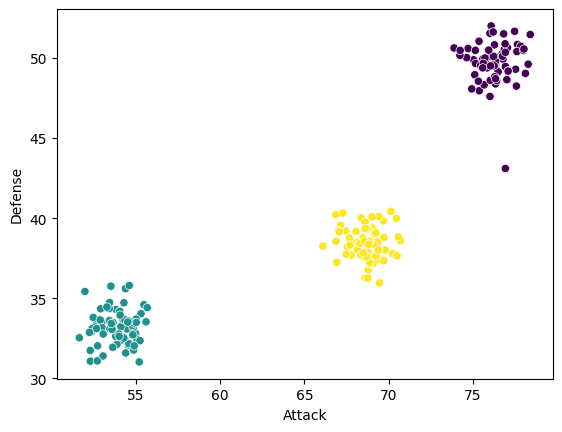

In [4]:
sns.scatterplot(x = pokemon.Attack, y = pokemon.Defense, c=prectral_predictions);

In [5]:
spectral_clustering = SpectralClustering(n_clusters=4, random_state=42) #по умолчанию кластеров 8 
spectral_clustering.fit(pokemon[['Attack', 'Defense']])
prectral_predictions = spectral_clustering.labels_

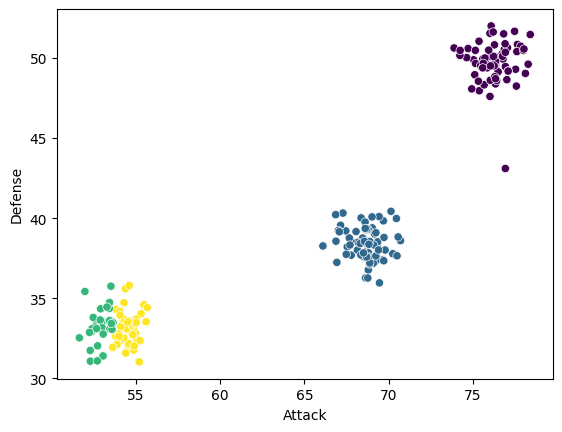

In [6]:
sns.scatterplot(x = pokemon.Attack, y = pokemon.Defense, c=prectral_predictions);

Как мы можем заметить, спектральная кластеризация так же, как и другие типы кластеризации, не справляется с выбросами и не выделяет их в отдельный кластер. К сожалению, этот недостаток алгоритма нельзя исправить.

К плюсам спектральной кластеризации можно отнести:
1. Подходит для кластеризации данных с большим количеством признаков, так как использует **технику понижения размерности**.
2. Эффективна для кластеризации разрежённых данных.
3. Хорошо работает на практически любых распределениях данных. 

Однако к минусам отнесем:
1. Нужно заранее задавать количество кластеров.
2. Подходит для задач **сбалансированной** классификации, то есть количество точек между кластерами не сильно отличается.

### Кластеризация на основе плотности

Такая кластеризация находит в датасете области с высокой плотностью и на их основе образует кластеры. Редкие объекты, которые находятся в отдалении от других данных и для которых нужен отдельный кластер, считаются шумом.

При кластеризации на основе плотности нам **не нужно задавать количество кластеров** — алгоритм сам определяет оптимальное число. Такой алгоритм кластеризации отлично справляется с выбросами и с данными произвольной формы

Алгоритм DBSCAN (DENSITY-BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE) применим, если: 
1. стоит задача с данными сложной формы, например выделение районов на карте
2. в данных большое количество выбросов, например данные медицинских анализов пациентов

!!! В таких случаях ранее изученный алгоритм k-means не поможет. Зато на помощь придёт DBSCAN.

Есть понятие центральные точки. Центральными будут считаться точки, вокруг которых находится три или более объектов. Данное значение обычно задаётся пользователем.

Для чего применяется такая кластеризация? Для разработки системы рекомендаций в магазине. Для поиска отклонений медицинских показателей пациентов или для анализа финансового мошенничества (т к он успешно справляется с поиском выбросов в данных). Для кластеризации геоданных, так как он может выделять данные сложной формы

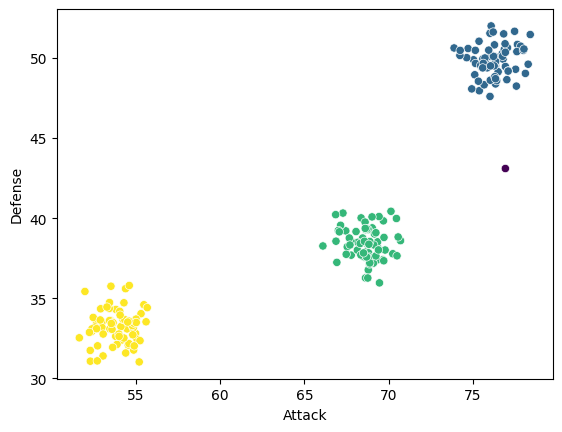

In [17]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps = 3, min_samples=3).fit(pokemon[['Attack', 'Defense']]) # eps-это радиус; если данные разрежённые, значение радиуса должно быть больше; аналогично если  данные расположены близко друг к другу, значение радиуса можно уменьшить
# min_samples - необходимое кол-во точек ,которое должно быть в заданной радиусе, чтобы точка была центральной
sns.scatterplot(x = pokemon.Attack, y = pokemon.Defense, c = clustering.labels_);

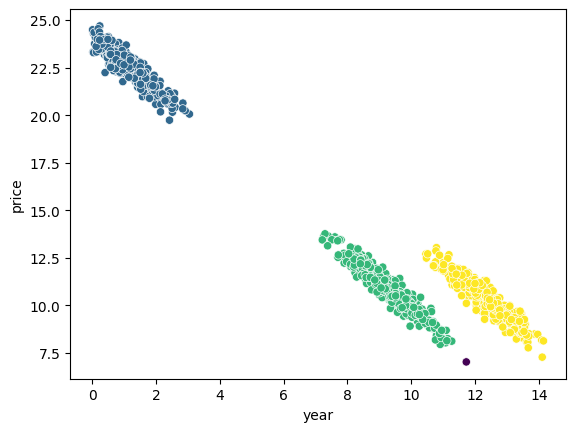

In [25]:
house = pd.read_csv('/Users/olgazdanova/Downloads/housing 3.csv')
clust = DBSCAN(eps=0.7, min_samples=5).fit(house)
sns.scatterplot(x = house.year, y = house.price, c = clust.labels_);

### Визуализация результатов кластеризации